In [ ]:
# Exploration:
# Investigating patterns and significant differences or patterns within our data that correlates to our desired target
# target in this case is our logerr
# 
# Data Science Pipeline:
# Plan
# Acquire
# Prep
# Explore

In [1]:
# Bonus:
# Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test
# between the overall mean and the mean for each zip code. We want to identify the zip codes where the
# error is significantly higher or lower than the expected error. 

In [2]:
# Ask 5 questions of the data as per the instructions:

In [3]:
# Exploration tactics involving:
# Univariate Exploration
# Bivariate Exploration
# Multivariate Exploration
# including but not limited to:
# means testing, proportion testing, correlation metrics, visualizations

In [4]:
# 1. Distribution of the independent variables

In [5]:
# 2. Is logerror significantly different across zip codes/counties

In [6]:
# 3. Is there a relation between square footage and logerror, linear correlation or otherwise?

In [7]:
# 4. Is there a relationship between longitude and logerror?

In [8]:
# 5. Accounting for Bedroom counts, is there a relationship between error and geolocation via long/lat?

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import explore
import math

In [4]:
# 1. Distribution of the independent variables

In [11]:
# acquire our data

In [10]:
df = acquire.get_zillow_data()

In [13]:
# clean our data (very simple version)
df = prepare.handle_missing_values(df, prop_required_column=1, prop_required_row=1)

In [15]:
df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'assessmentyear',
       'transactiondate', 'logerror', 'propertylandusedesc'],
      dtype='object')

In [16]:
df = prepare.remove_outliers_iqr(df, ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet','latitude', 'longitude'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72411 entries, 0 to 73423
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72411 non-null  int64  
 1   parcelid                      72411 non-null  int64  
 2   bathroomcnt                   72411 non-null  float64
 3   bedroomcnt                    72411 non-null  float64
 4   calculatedfinishedsquarefeet  72411 non-null  float64
 5   fips                          72411 non-null  float64
 6   latitude                      72411 non-null  float64
 7   longitude                     72411 non-null  float64
 8   propertycountylandusecode     72411 non-null  object 
 9   propertylandusetypeid         72411 non-null  float64
 10  rawcensustractandblock        72411 non-null  float64
 11  regionidcounty                72411 non-null  float64
 12  roomcnt                       72411 non-null  float64
 13  a

In [18]:
train, validate, test = explore.train_validate_test_split(df, 'logerror')

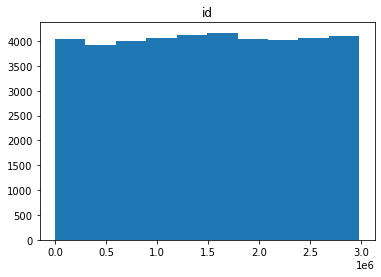

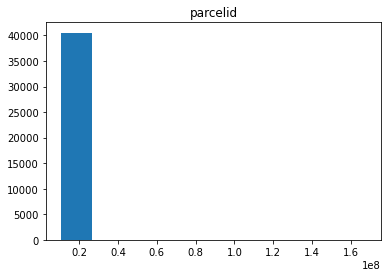

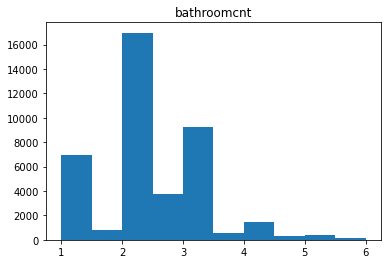

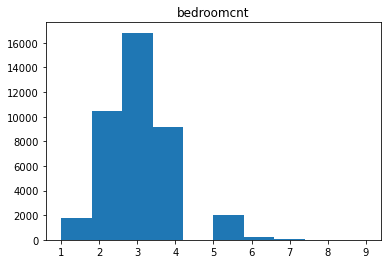

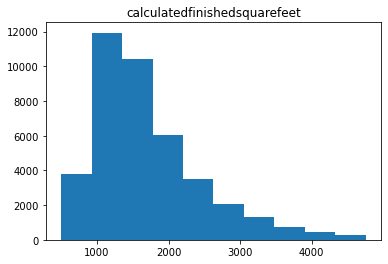

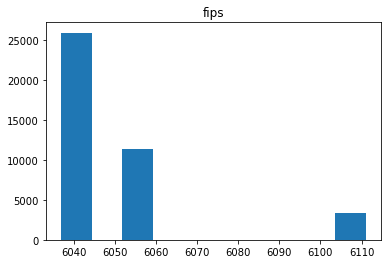

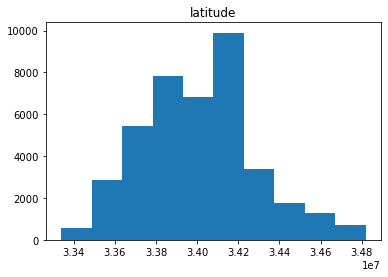

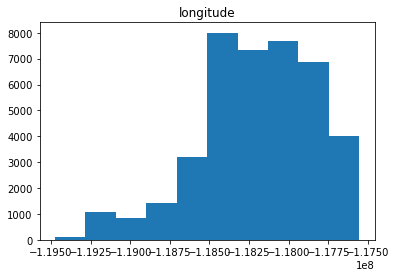

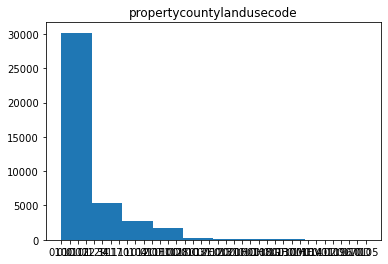

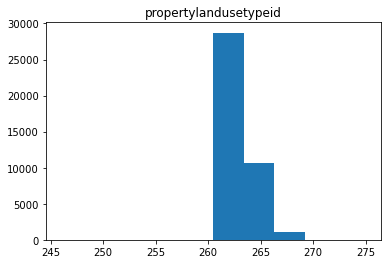

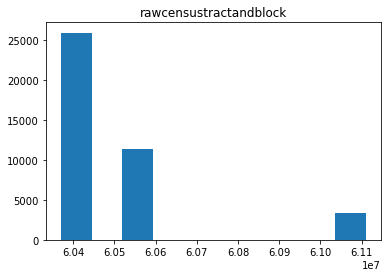

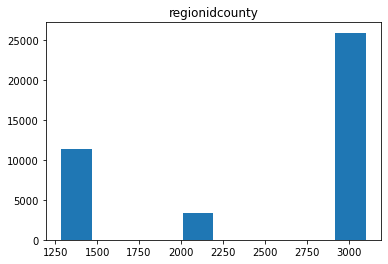

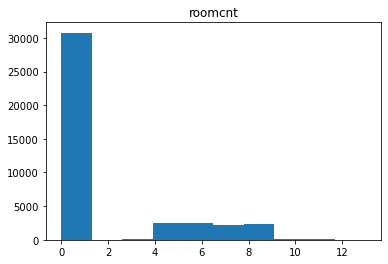

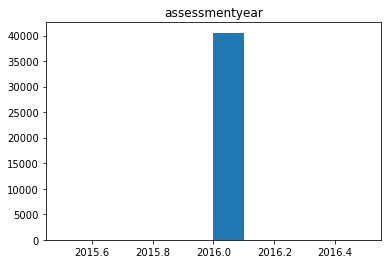

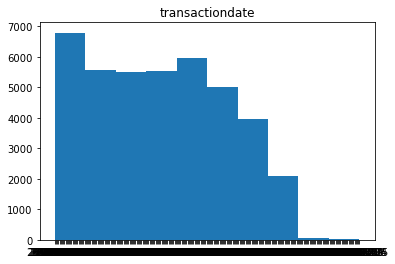

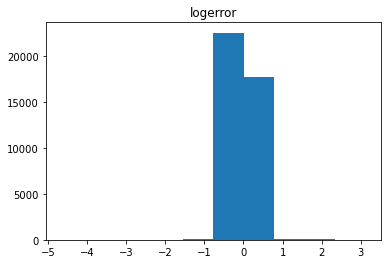

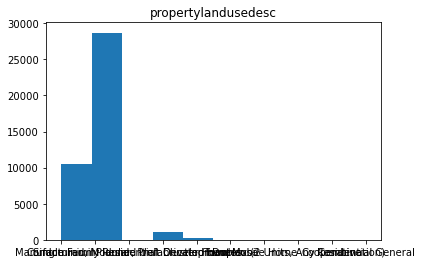

In [19]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [20]:
# takeaways:
# longitude looks slightly less normally distributed than latitude
# bedroomcount looks more nromally distributed than  bathroomcount
# target logerror looks (approximately) normal at first glance
# roomcnt looks erroneous

In [5]:
# 2. Is logerror significantly different across zip codes/counties

In [21]:
train.fips.value_counts()

6037.0    25873
6059.0    11283
6111.0     3393
Name: fips, dtype: int64

In [22]:
# 06111 = Ventura
# 6037 = Los Angeles
# 6059 = Orange

In [23]:
train['county'] = train.fips.apply(lambda x: 'orange' if x == 6059.0 else 'los_angeles' if x == 6037.0 else 'ventura')

In [24]:
train.county.value_counts()

los_angeles    25873
orange         11283
ventura         3393
Name: county, dtype: int64

/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


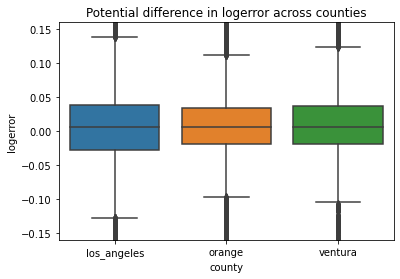

In [27]:
sns.boxplot(train.county, train.logerror)
plt.title('Potential difference in logerror across counties')
plt.ylim(-.16, .16)
plt.show()

In [28]:
# LA county vs Orange County

In [29]:
# presume our target is roughly normal, so we can go about using a t-test

In [30]:
# Test for equal variance:
# H0: variance in the logerr in Orange County and Los Angeles are equivalent
# alpha = 0.05
stats.levene(train[train.county == 'los_angeles'].logerror, train[train.county == 'orange'].logerror)

LeveneResult(statistic=7.076698244672891, pvalue=0.007812629834499735)

In [31]:
# Reject null hypotheis, proceed with the presumption of inequal variance

In [32]:
# H0: Mean logerror in Orange County is equivalent to Mean Error in Los Angeles County

In [33]:
stats.ttest_ind(train[train.county == 'los_angeles'].logerror, train[train.county == 'orange'].logerror, equal_var=False)

Ttest_indResult(statistic=-5.2019093666545775, pvalue=1.9951782273449193e-07)

In [ ]:
# Reject the null hypothesis and suggest there is significant difference 
# between means of logerror between orange and Los Angeles Counties

In [ ]:
# Takeaway is that there is significance in the county or fips code of the location

In [6]:
# 3. Is there a relation between square footage and logerror, linear correlation or otherwise?

Relationship between Square footage and Logerror?


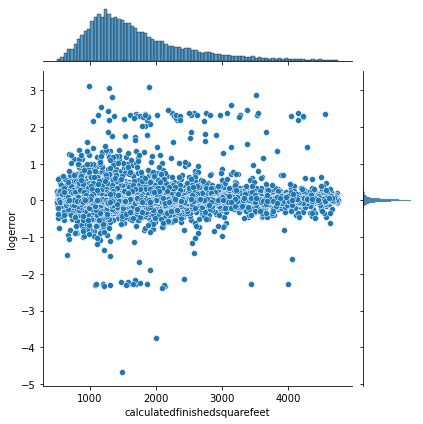

In [34]:
print('Relationship between Square footage and Logerror?')
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train)
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Logerror')
plt.show()

In [35]:
# Takeaway: There apppears to be no distinct clusters or linear relationship between square footage and 
# logerror, though the spread of outliers as square footage increases suggests it may be useful going forward in 
# multivariate analysis or feature engineering

In [7]:
# 4. Is there a relationship between longitude and logerror?

Relationship between Longitude and Logerror?


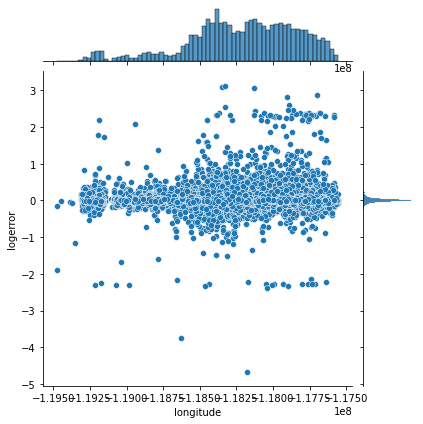

In [37]:
print('Relationship between Longitude and Logerror?')
sns.jointplot(x='longitude', y='logerror', data=train)
plt.xlabel('Longitude')
plt.ylabel('Logerror')
plt.show()

In [7]:
# 4.5 Is there a relationship between bedroomcount and logerror?

Relationship between Bedroom count and Logerror?


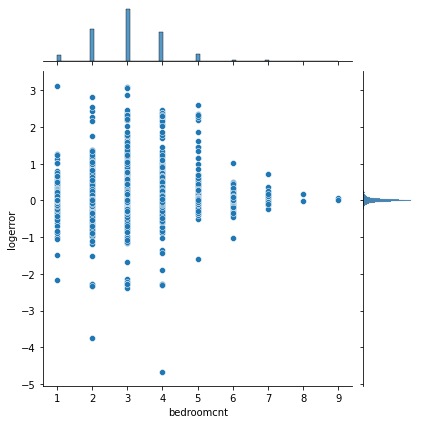

In [38]:
print('Relationship between Bedroom count and Logerror?')
sns.jointplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom Count')
plt.ylabel('Logerror')
plt.show()

In [39]:
# Observation: There appears to be a division between properties with more than 5 bedrooms having less error than those
# with less than 5 bedrooms

In [40]:
# H0: Variance in logerror for homes with 5 or less bedrooms is equivalent to those with more than 5 bedrooms
# alpha of 0.05
stats.levene(train[train.bedroomcnt > 5].logerror, train[train.bedroomcnt <= 5].logerror)

LeveneResult(statistic=2.495592391697735, pvalue=0.1141732119190622)

In [41]:
# presume equal variance, cannot reject null

In [42]:
# H0: Mean logerror for homes with 5 or less bedrooms is equivalent to those with more than 5 bedrooms
stats.ttest_ind(train[train.bedroomcnt > 5].logerror, train[train.bedroomcnt <= 5].logerror)

Ttest_indResult(statistic=2.0489747015895006, pvalue=0.040471010870086116)

In [43]:
# Reject the null hypothesis and say that there is a significant difference in the mean logerror in homes with with more than 
# 5 bedrooms compared to those with less than that value

In [8]:
# 5. Accounting for Bedroom counts, is there a relationship between error and geolocation via long/lat?

In [45]:
train['abs_logerr'] = train.logerror.apply(lambda x: x if x >= 0 else -x)

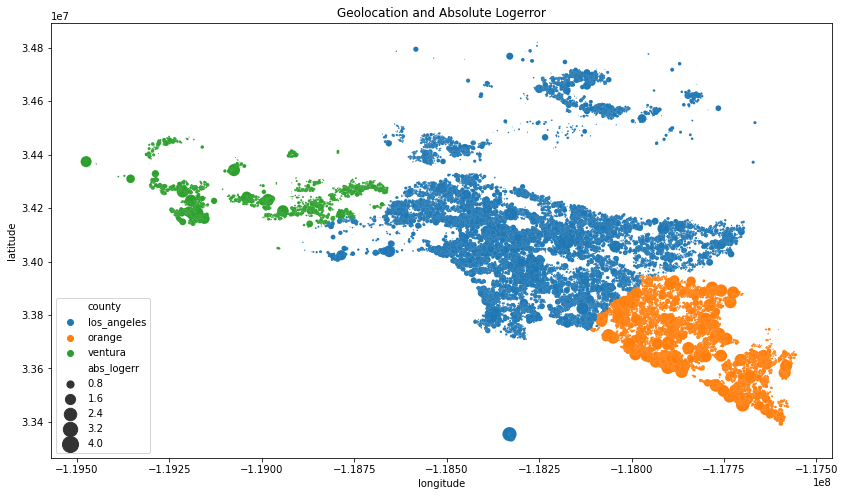

In [46]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python

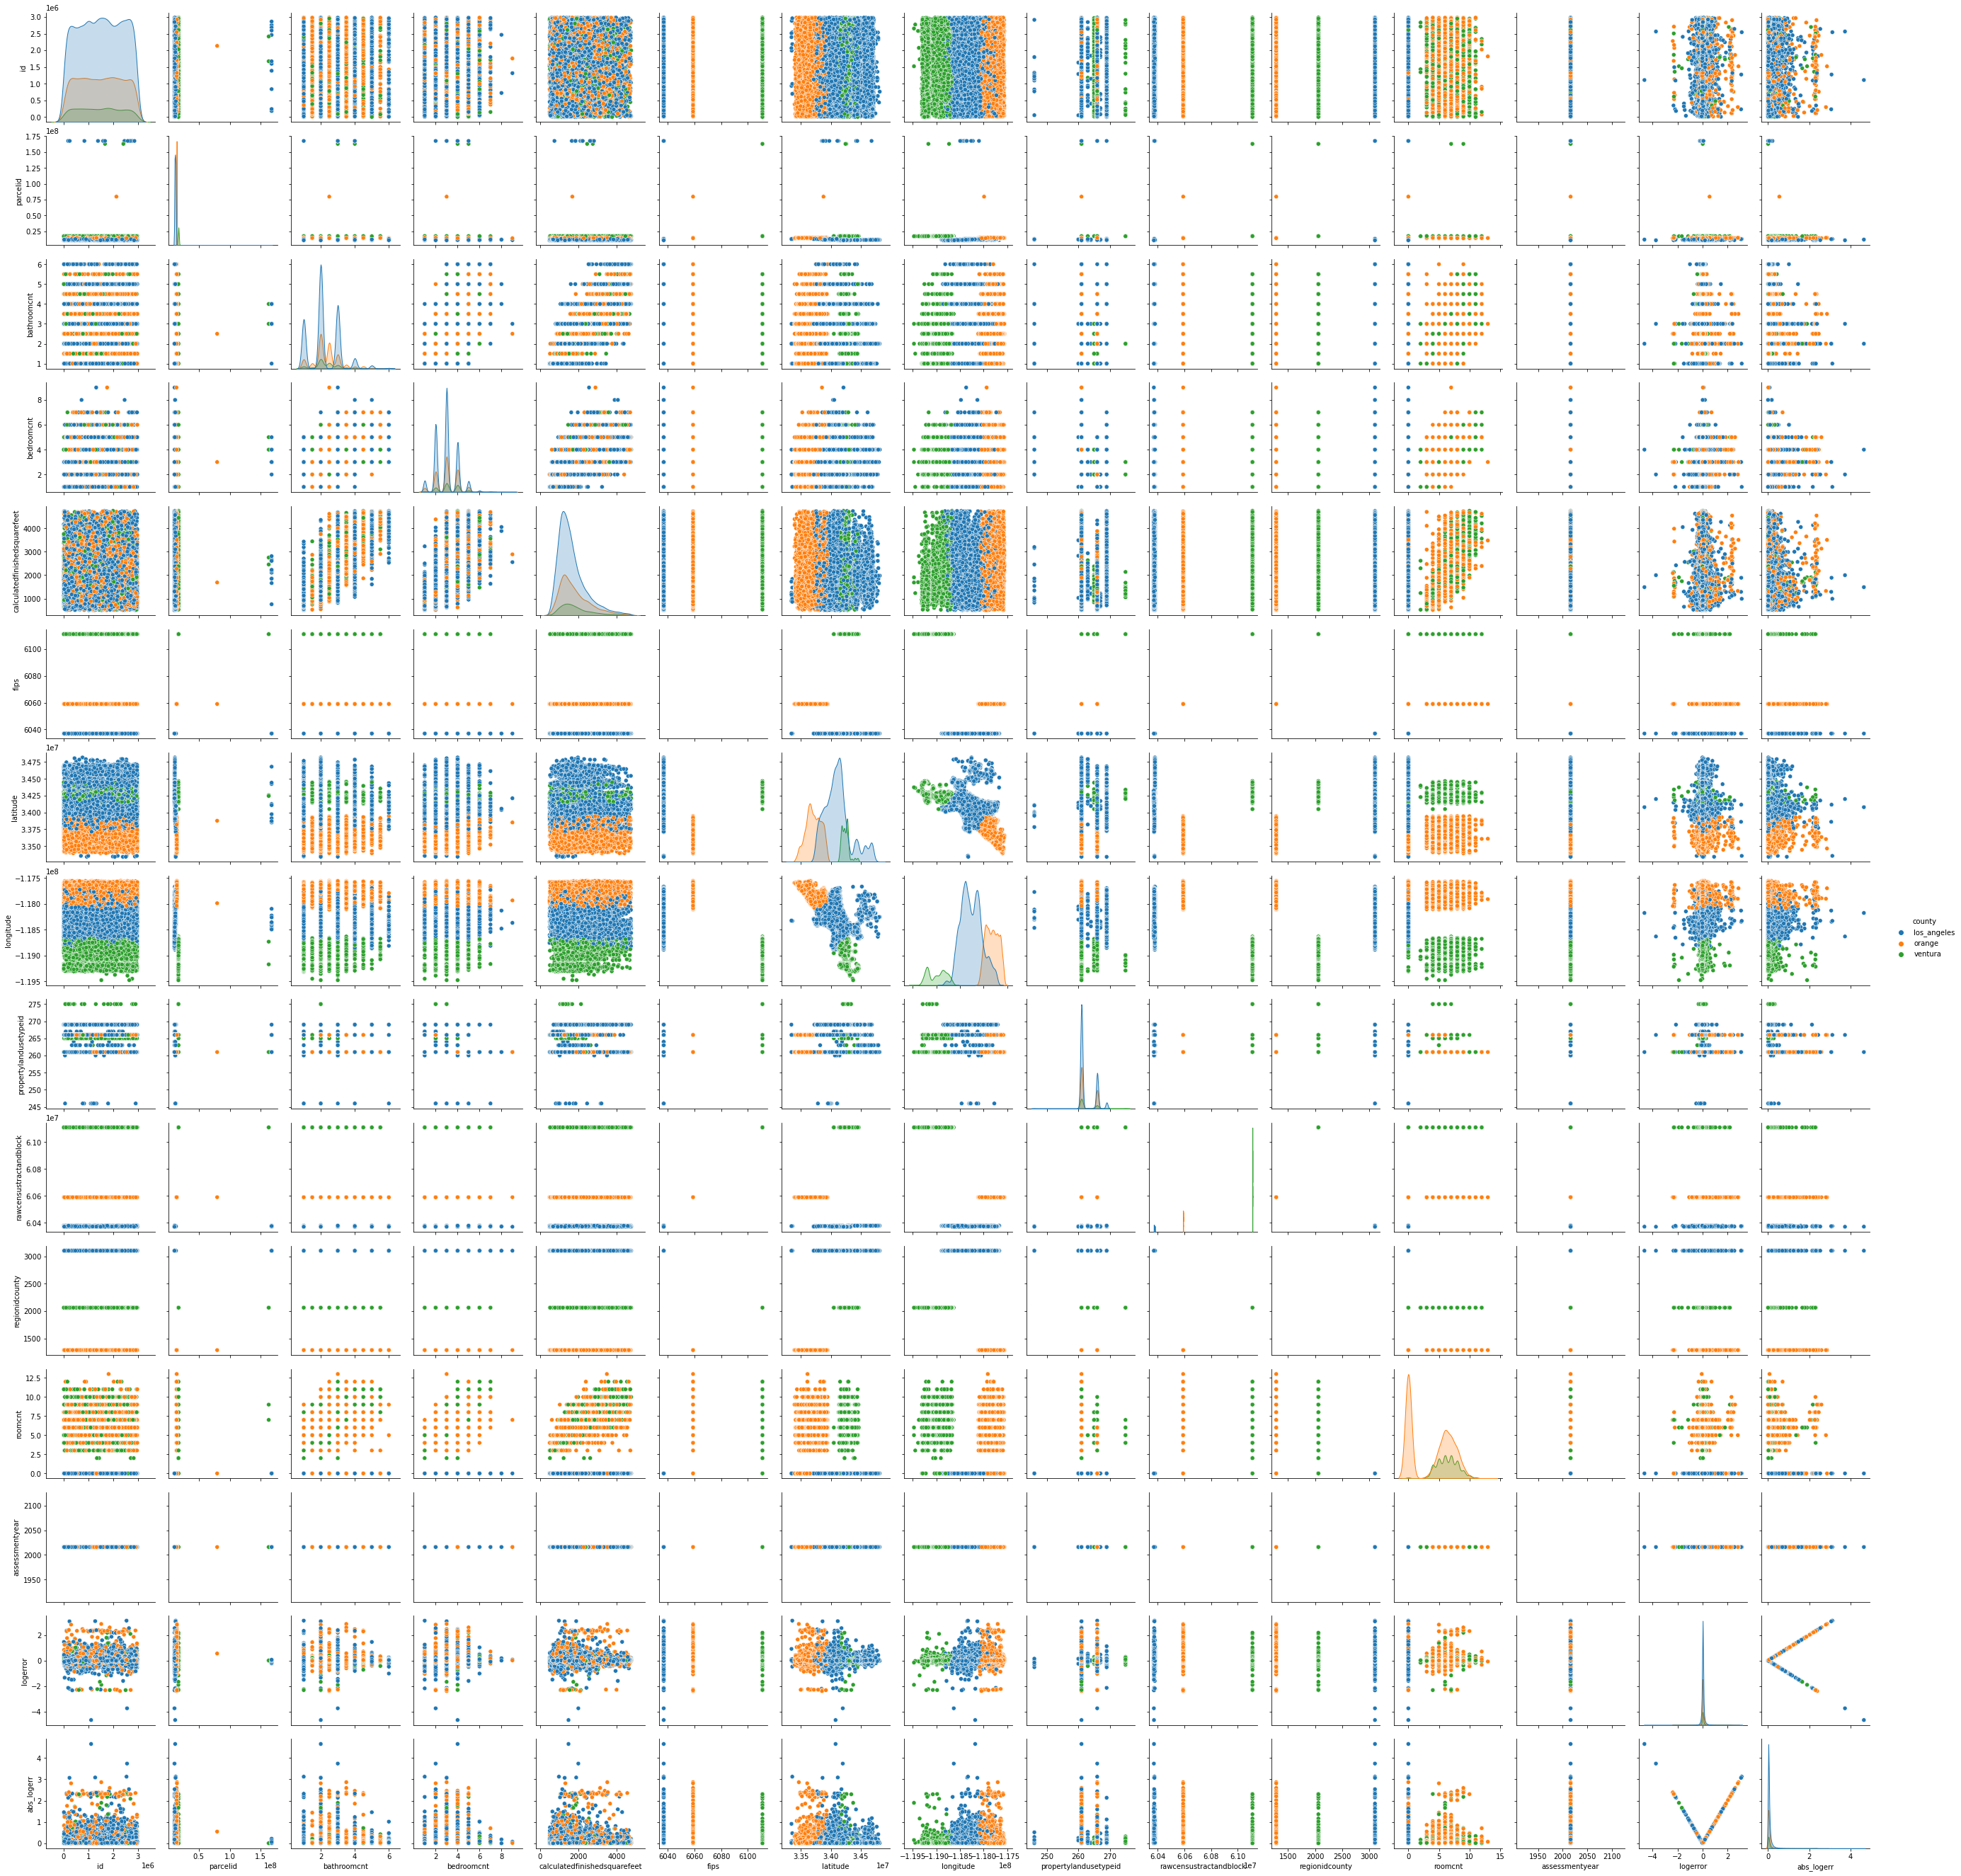

In [47]:
sns.pairplot(train, hue='county')

In [48]:
train['bedroom_bin'] = pd.cut(train.bedroomcnt, [0,4,10])

In [50]:
train.bedroom_bin.value_counts()

(0, 4]     38237
(4, 10]     2312
Name: bedroom_bin, dtype: int64

In [52]:
train[train.bedroomcnt <= 4].shape

(38237, 20)

/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/template/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


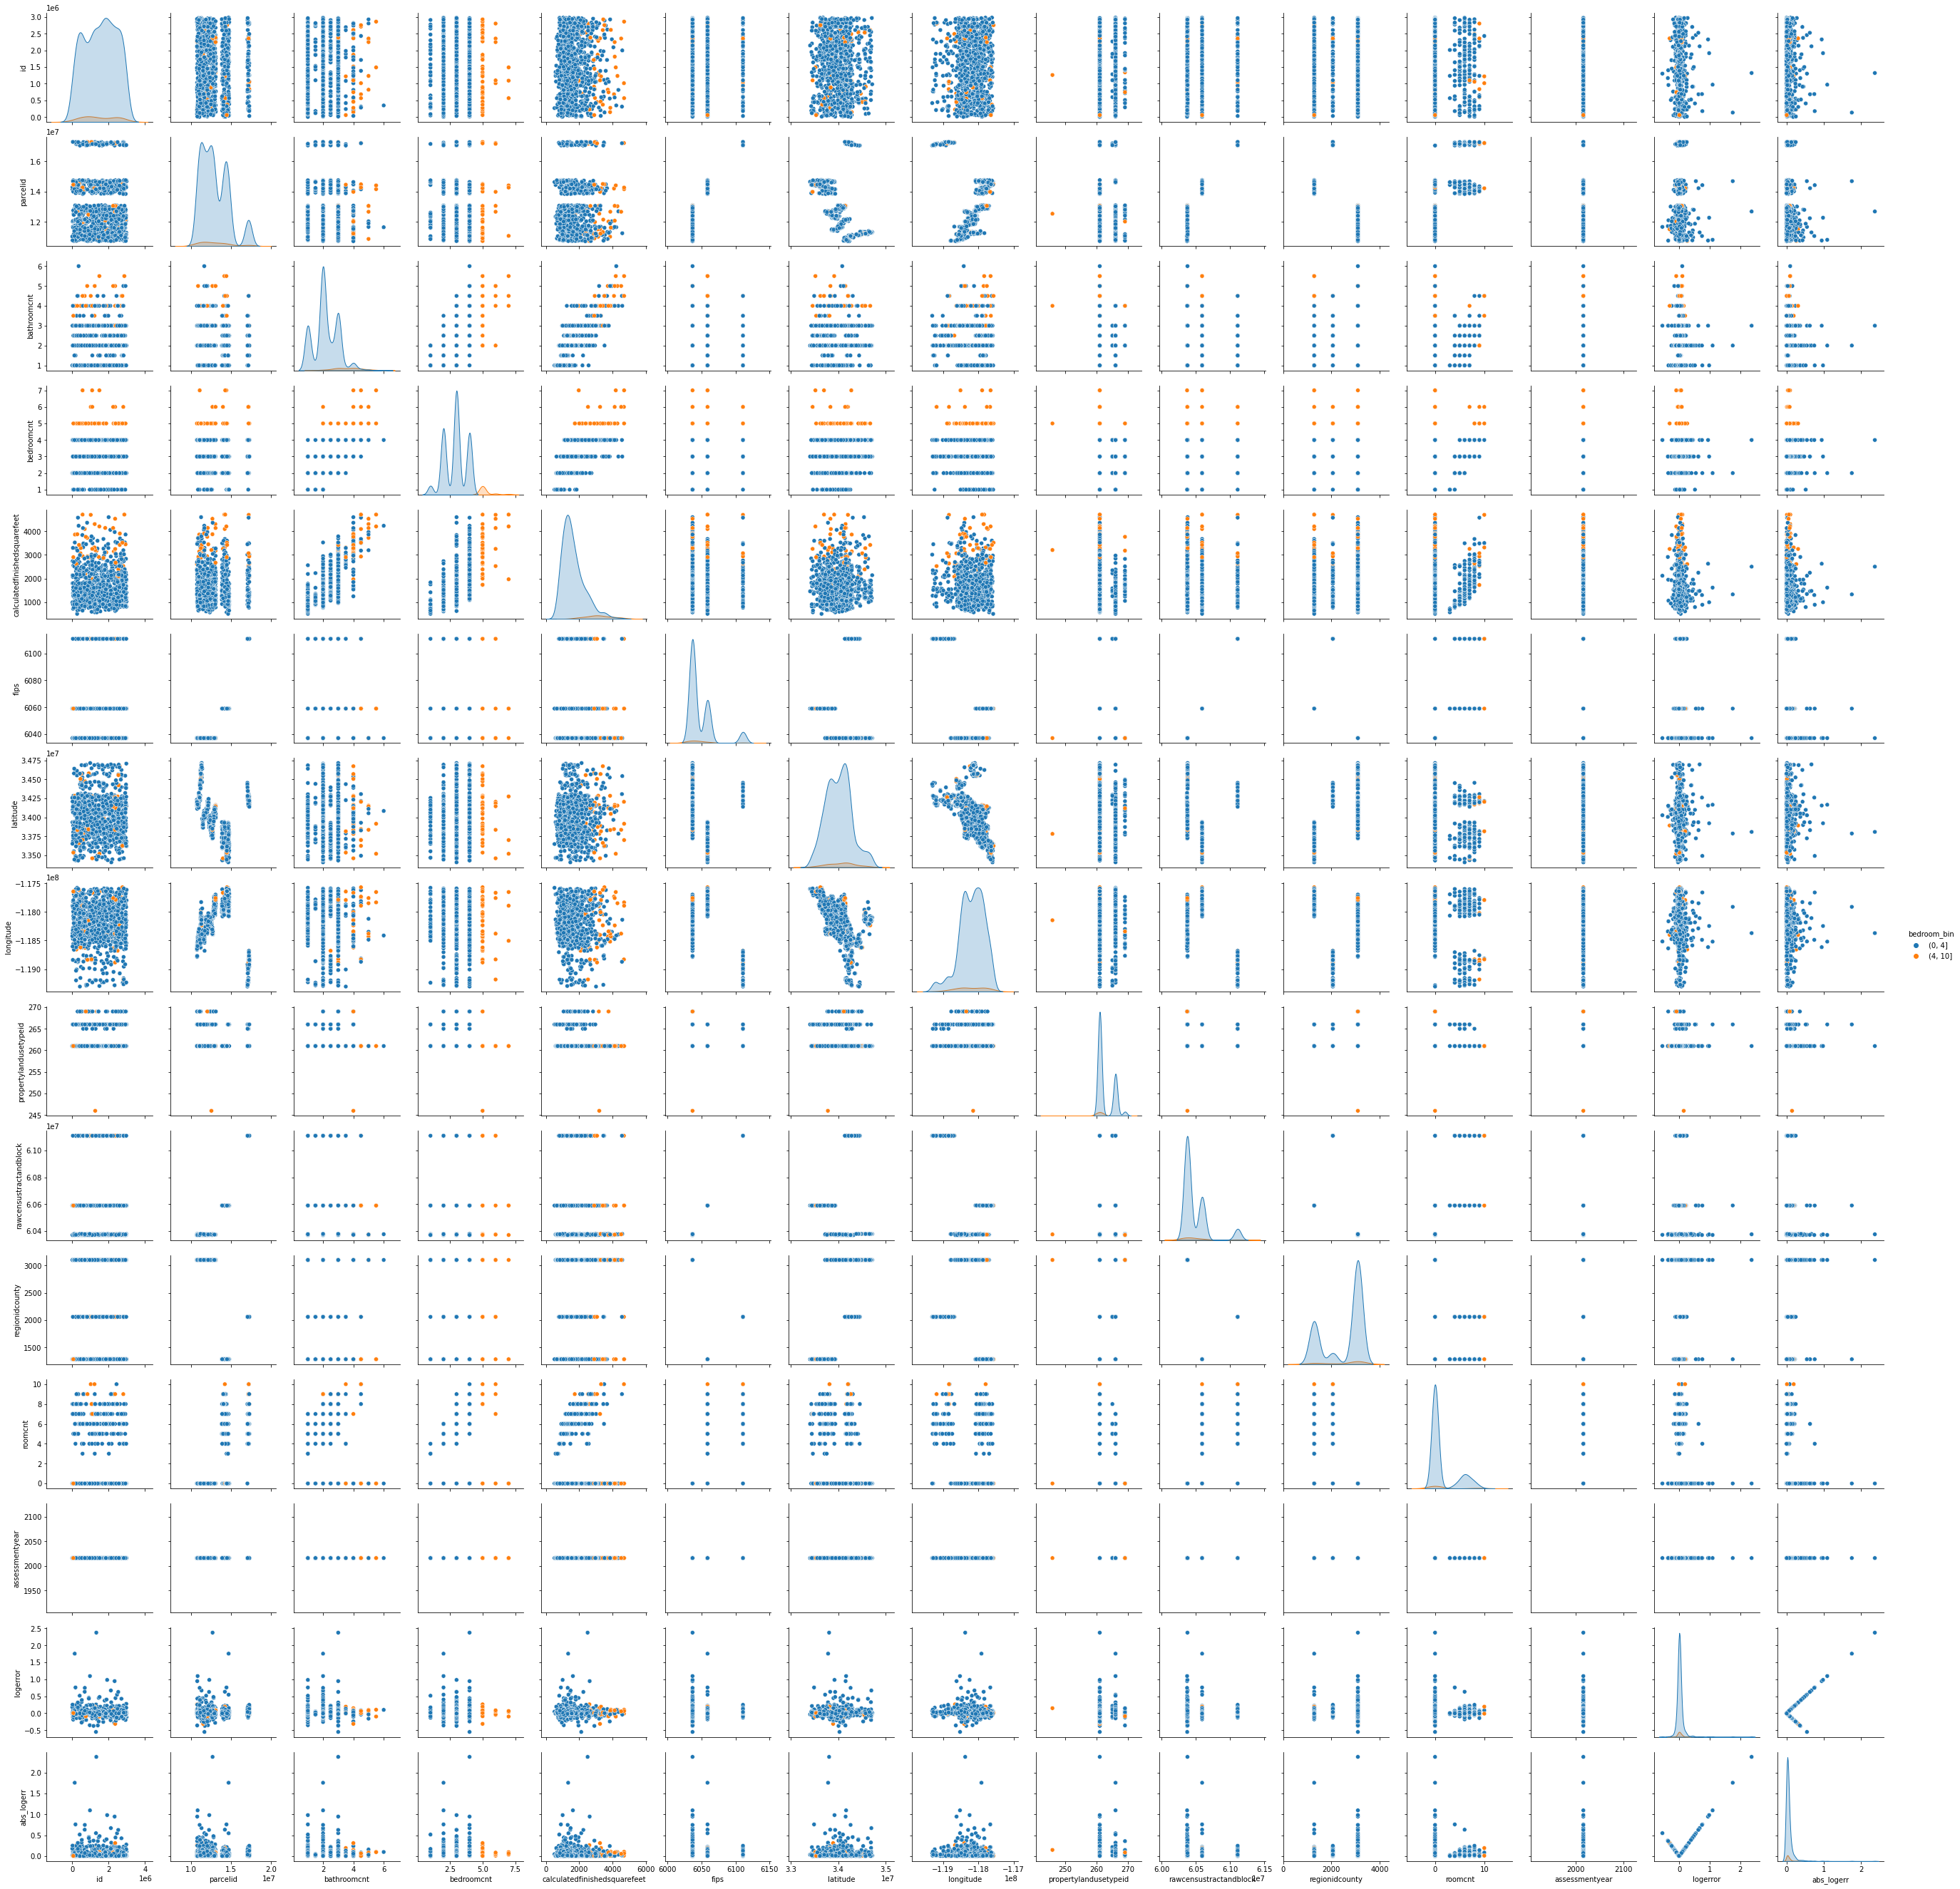

In [53]:
sns.pairplot(train.sample(1000), hue='bedroom_bin')

In [1]:
# Bonus:
# Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test
# between the overall mean and the mean for each zip code. We want to identify the zip codes where the
# error is significantly higher or lower than the expected error. 

In [54]:
fips_with_significantly_different_errors = []
counties = train.county.unique()

In [55]:
counties

array(['los_angeles', 'orange', 'ventura'], dtype=object)

In [56]:
population_logerror_mean = train.logerror.mean()

In [57]:
for paakalbum in counties:
    t, p = stats.ttest_1samp(train[train.county == paakalbum].logerror, population_logerror_mean)
    if p < 0.05:
        fips_with_significantly_different_errors.append(paakalbum)

In [58]:
fips_with_significantly_different_errors

['los_angeles', 'orange']